# Análisis del Consumo de Drogas Mediante el Estudio de Aguas Residuales en Europa y España

Análisis del consumo de drogas en Europa y en España a través de datos proporcionados por estaciones de aguas residuales.

Mediante el estudio de cinco diferentes metabolitos, se resuelven algunas interrogantes como cuáles son los países que más drogas consumen a nivel europeo, si hay alguna relación con el crecimiento de la población o si la pandemia ha impactado en el uso de drogas a través del continente.

Respecto a España, se realizan los mismos análisis a pesar de que los datos son más reducidos y se evalúa el consumo en algunas de sus ciudades.

## Hipótesis

1) El consumo de drogas en España está directamente relacionado a su población.
2) El consumo de drogas ha aumentado desde la pandemia
3) El consumo de cocaína es mayor que el consumo de otras drogas

#### Basics

In [104]:
# Importo librerías necesarias y leo el dataframe principal.
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
pd.options.display.max_rows = 100
europafull = pd.read_csv("'../src/Data/aguas_residuales.csv")
europafull

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
0,2022,amphetamine,AT001,AT,Graz,24.00,20.90,24.22,27.86,28.27,23.80,22.20,22.37,26.03,24.46
1,2022,amphetamine,AT002,AT,Hall-Wattens,9.01,13.61,9.28,11.82,11.08,11.31,6.84,9.82,10.87,10.42
2,2022,amphetamine,AT004,AT,Innsbruck,10.18,9.80,11.70,16.02,14.86,13.35,19.45,13.14,13.98,13.62
3,2022,amphetamine,AT005,AT,Kapfenberg,32.16,28.14,30.94,21.49,21.35,23.80,12.96,24.42,24.40,24.41
4,2022,amphetamine,AT006,AT,Klagenfurt,6.74,6.87,12.77,9.57,11.62,7.86,6.65,6.76,10.46,8.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3075,2011,methamphetamine,NL001,NL,Amsterdam,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3076,2011,methamphetamine,NL002,NL,Eindhoven,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3077,2011,methamphetamine,NL005,NL,Utrecht,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3078,2011,methamphetamine,NO001,NO,Oslo,235.00,212.60,231.06,186.16,295.50,302.46,250.71,232.77,253.80,244.79


In [105]:
# Traducción de metabolitos:
mets = {'amphetamine' : 'Anfetamina',
        'cannnabis' : 'Cannabis',
        'cocaine' : 'Cocaína',
        'ketamine' : 'Ketamina',
        'methamphetamine' : 'Metanfetamina'}

In [106]:
# Cambio de siglas a nombre completo para una mejor lectura.
siglas = {'AT': 'Austria',
        'BA': 'Bosnia y Herzegovina',
        'BE': 'Bélgica',
        'CH': 'Suiza',
        'CY': 'Chipre',
        'CZ': 'República Checa',
        'DE': 'Alemania',
        'DK': 'Dinamarca',
        'EE': 'Estonia',
        'ES': 'España',
        'FI': 'Finlandia',
        'FR': 'Francia',
        'GB': 'Reino Unido',
        'GR': 'Grecia',
        'HR': 'Croacia',
        'IS': 'Islandia',
        'IT': 'Italia',
        'LT': 'Lituania',
        'LV': 'Latvia',
        'MT': 'Malta',
        'NL': 'Países Bajos',
        'NO': 'Noruega',
        'PL': 'Polonia',
        'PT': 'Portugal',
        'RO': 'Rumanía',
        'RS': 'Serbia',
        'SE': 'Suecia',
        'SI': 'Eslovenia',
        'SK': 'Eslovaquia',
        'TR': 'Turquía'}

europafull.Country.replace(siglas, inplace=True)

In [107]:
# Traducimos los días para su posterior visualización en gráficas.
dias = {'Monday' : 'Lunes',
        'Tuesday' : 'Martes',
        'Wednesday' : 'Miércoles',
        'Thursday' : 'Jueves', 
        'Friday' : 'Viernes',
        'Saturday' : 'Sábado',
        'Sunday' : 'Domingo'}

In [108]:
columnlist = ['Site ID', 'City', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Weekday mean', 'Weekend mean']

In [109]:
paleta = ['#FBFF00', '#42FF00', '#FF0000', '#00B2FF', '#FF008B', '#FF9700']
leyenda = ['Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'MDMA', 'Metanfetamina']

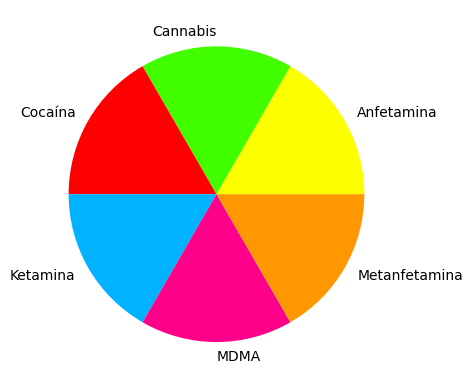

In [110]:
metabolitos = pd.DataFrame(['Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'MDMA', 'Metanfetamina'])
plt.pie(x=metabolitos.value_counts(),
        colors= paleta,
        labels= leyenda);

# Europa

## Consumo General

In [111]:
# Elimino las columnas innecesarias para el primer objetivo, que es solo la media de países.
europa = europafull.drop(columnlist, axis=1)

In [112]:
media10a = europa.groupby(['Country','Metabolite']).agg({'Daily mean' : 'mean'})

In [113]:
# el dataframe media10a servirá posteriormente para la elaboración de un mapa coroplético.

# media10a.to_csv('data/media.csv')

# No incluyo los mapas en este notebook porque al hacer todos los mapas, solo se representa el primero.
# Creo que es un problema de mi ordenador, o del kernel, porque al reinicializar se pueden ver algunos (no todos) cambios.
# Estará incluído el código en otro notebook, llamado mapas.ipynb

In [114]:
# Evolución del consumo:
evolconeur = europa.groupby(['Metabolite', 'Year']).agg({'Daily mean' : 'mean'}).unstack(level=0)

In [115]:
# Relleno valores vacíos. 
# En el caso del cannabis, al haber un 'gap' entre 2013 y 2018, se rellenan con los últimos datos obtenidos.
# En el caso de la ketamina, se rellenan con cero, puesto que su consumo aparece repentinamente en el último año.
#       Puede deberse a que en los años anteriores su obtención estuvo restringida, o limitada.
# Nota: en la documentación del dataframe original se indica que el 0 no significa ausencia de metabolitos sino valores demasiado pequeños para ser medidos (trazas).
evolconeur[('Daily mean', 'cannabis')].fillna(method='ffill', inplace= True)
evolconeur[('Daily mean', 'ketamine')].fillna(0, inplace= True)

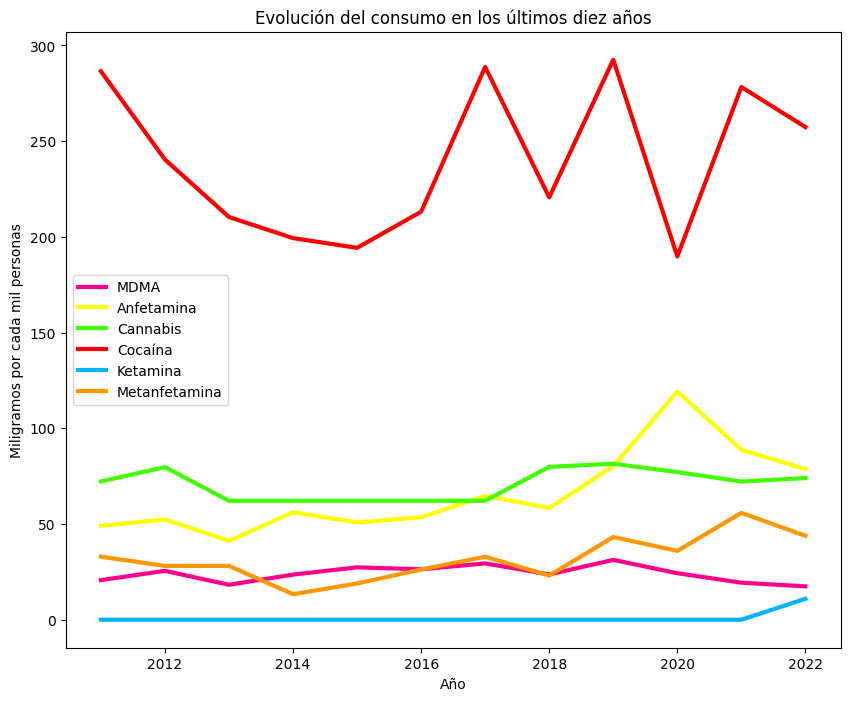

In [116]:
# Se crea una gráfica con los valores de consumo en los últimos diez años.
evolconeur.plot(figsize = (10,8), title= 'Evolución del consumo en los últimos diez años',
                ylabel='Miligramos por cada mil personas',
                xlabel='Año',
                color= ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#00B2FF','#FF9700'],
                linewidth = 3);
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'Metanfetamina']);

## Consumo Semanal

In [117]:
# Filtro el dataframe principal para obtener así uno con los datos de consumo semanales.
semanal = europafull.rename(columns=dias)
semanal.drop(columns=['Year','Site ID', 'Country', 'City', 'Weekday mean', 'Weekend mean', 'Daily mean'], inplace=True)
semanal = semanal.groupby('Metabolite').mean()
semanal = semanal.reindex(columns= ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
semanal.reset_index(inplace=True)

In [118]:
semelted = semanal.melt(id_vars=['Metabolite'],
                           value_vars=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
                           var_name='dia',
                           value_name= "cantidad")

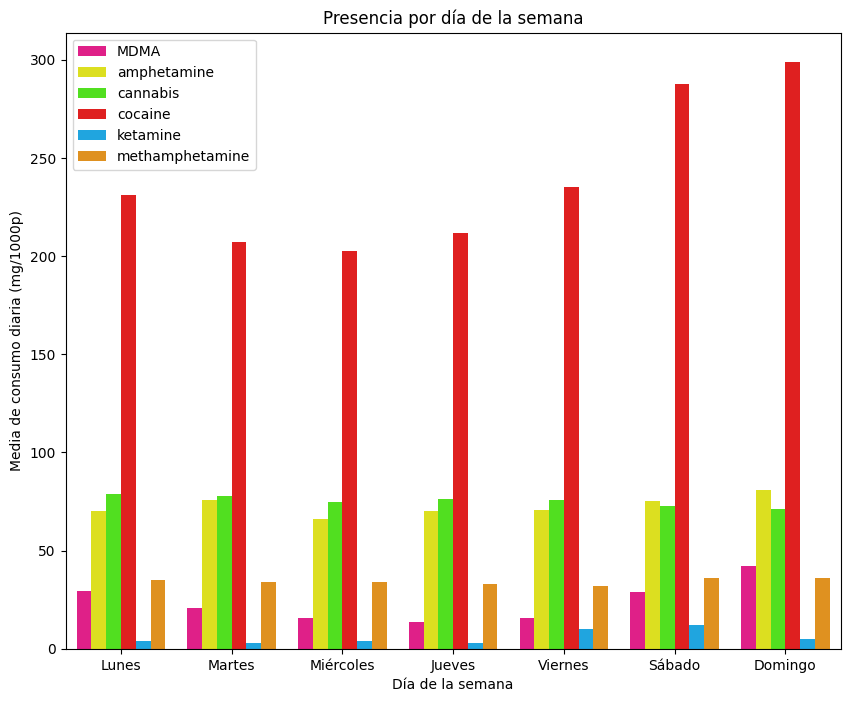

In [119]:
fig2, ax = plt.subplots(figsize=(10,8))
sns.barplot(data = semelted,
            x='dia',
            y='cantidad',
            hue='Metabolite',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#00B2FF', '#FF9700'])
ax.set_title('Presencia por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Media de consumo diaria (mg/1000p)')
ax.legend(loc='upper left');
# ax.legend(['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'Metanfetamina'], loc='upper left');
# Por algún motivo, si cambio las etiquetas de la leyenda, el color de en la misma pasa a ser negro en lugar de representar cada valor...

In [120]:
# Procedo a hacer una gráfica semanal, pero sin cocaína, para observar mejor los otros valores.
semanal2 = semanal.drop(index=3)
semelted2 = semanal2.melt(id_vars=['Metabolite'],
                           value_vars=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
                           var_name='Día de la semana',
                           value_name= "Miligramos por mil personas")

(<matplotlib.legend.Legend at 0x1b31b9bd148>,)

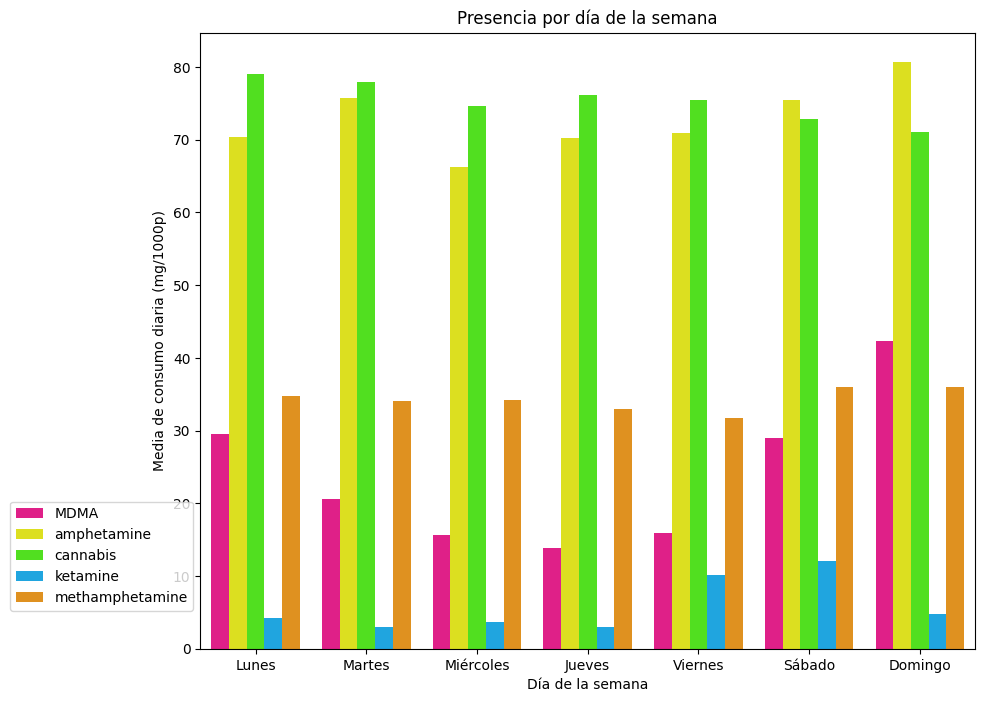

In [121]:
fig3, ax = plt.subplots(figsize=(10,8))
sns.barplot(data = semelted2,
            x='Día de la semana',
            y='Miligramos por mil personas',
            hue='Metabolite',
            palette= ['#FF008B','#FBFF00', '#42FF00', '#00B2FF', '#FF9700'])
ax.set_title('Presencia por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Media de consumo diaria (mg/1000p)')
ax.legend(bbox_to_anchor=(0,0.25)),# labels=['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'Metanfetamina']);

## Relación con Población

In [122]:
# Leo el dataframe de población para luego realizar una comparación.
poblacion = pd.read_csv('../src/Data/europa.csv')

In [123]:
# Añado Metabolite a la lista de columnas para eliminarla y poder añadir la población.
columnlist.append('Metabolite')

In [124]:
# Elimino las columnas innecesarias del dataframe original para poder juntarlo con el de población.
popeuropa = europafull.drop(columnlist, axis=1)

In [125]:
poblacion = poblacion.melt(id_vars='Country', var_name='Year', value_name='Poblacion')
poblacion.sort_values(['Country', 'Year'])

,Country,Year,Poblacion
6,Alemania,2013,80523746.0
36,Alemania,2014,80767463.0
66,Alemania,2015,81197537.0
96,Alemania,2016,82175684.0
126,Alemania,2017,82521653.0
...,...,...,...
178,Turquía,2018,80810525.0
208,Turquía,2019,82003882.0
238,Turquía,2020,83154997.0
268,Turquía,2021,83614362.0


In [126]:
# Me acabo de dar cuenta de que tengo datos faltantes de algunos países para hacer la relación en cuanto a población.
# Sin embargo, filtro algunos países que tengan valores suficientes (7) para hacer una comparación de la relación.
    # Afortunadamente, entre ellos se encuentra España, que era necesario para la resolución de la hipótesis planteada.
# Creo un filtro nuevo (filtropop) que será usado para filtrar ambos dataframes y quedarme solo con los países escogidos.
intento = popeuropa[popeuropa.Year > 2015].groupby(['Country', 'Year']).sum().reset_index()
conteo = intento.groupby('Country').size()
conteo = conteo[conteo == 7]
filtropop = conteo.index

In [127]:
# Corrijo errores como cambiar la columna Year al tipo int y filtro los dataframes para cumplir objetivos ya mencionados.
poblacion.Year = poblacion.Year.astype(int)

poblacion = poblacion[poblacion.Country.isin(filtropop)]

poblacion = poblacion[poblacion.Year > 2015]

intento = intento[intento.Country.isin(filtropop)]

poblacion = poblacion.sort_values(['Country', 'Year'])

In [128]:
popeuropa = intento.merge(poblacion)

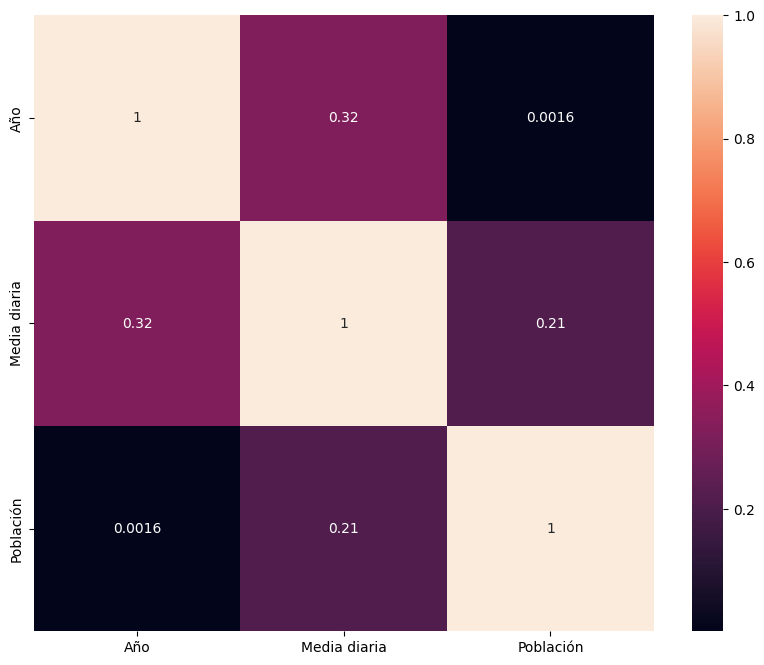

In [193]:
plt.figure(figsize=(10,8))
sns.heatmap(popeuropa.corr(), annot=True);

#### Se puede observar que no existe correlación entre el consumo de drogas y la población.

In [130]:
# Para asegurarnos, hacemos lo mismo con valores de España.
popespana = popeuropa.groupby('Country').get_group('España')

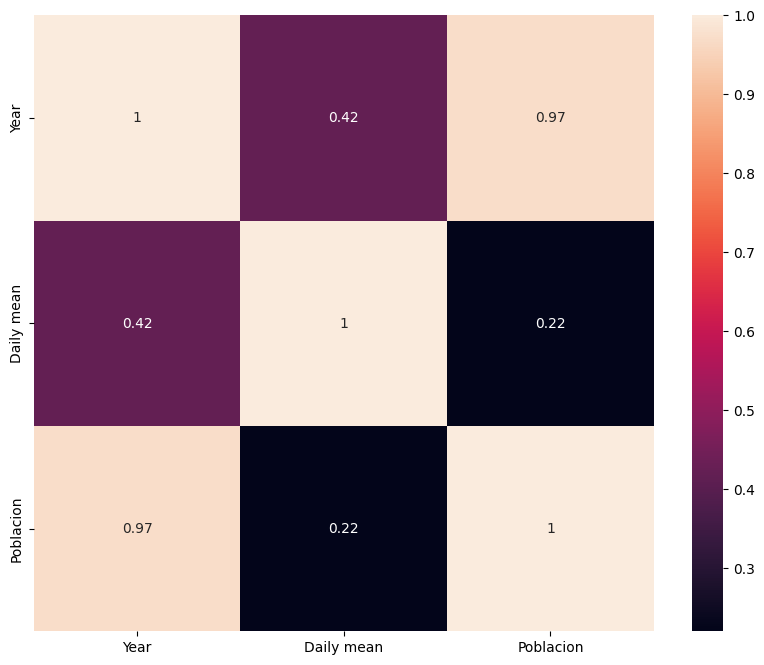

In [131]:
plt.figure(figsize=(10,8))
sns.heatmap(popespana.corr(), annot=True);

En España tampoco parece estar relacionado.

## Lista de Países por Consumo

In [132]:
# ¿Cuáles son los países que más consumen?
ranking= media10a.reset_index().groupby('Country', as_index=False).agg({'Daily mean' : 'mean'}).sort_values('Daily mean', ascending=False)
ranking = ranking.reset_index(drop=True)

In [133]:
top10= ranking.head(10)
top10

,Country,Daily mean
0,Países Bajos,191.881395
1,Reino Unido,155.631288
2,Islandia,149.862810
3,Suiza,149.010127
4,Bélgica,140.188420
5,Dinamarca,110.808679
6,Croacia,104.272803
7,República Checa,102.243060
8,España,99.747500
9,Noruega,99.673055


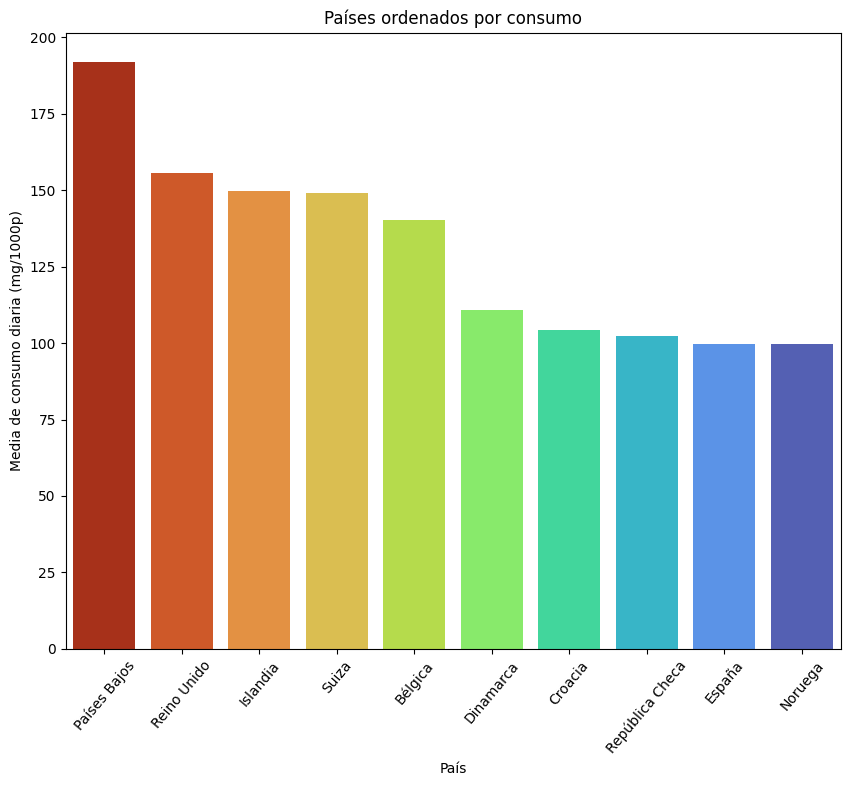

In [134]:
grank = plt.subplots(figsize= (10,8))
turbo = 'turbo'
sns.barplot(x='Country', y='Daily mean', data=top10, palette='turbo_r')
plt.xlabel('País')
plt.ylabel('Media de consumo diaria (mg/1000p)')
plt.title('Países ordenados por consumo')
plt.xticks(rotation=50);
# plt.ylim(bottom=70);

In [135]:
# Ranking de países:
# Primeros tres: Países Bajos, Reino Unido e Islandia.
# España se encuentra en el octavo lugar.
# Últimos tres: Turquía, Grecia y Rumanía

In [136]:
europafull.groupby('Country').get_group('Rumanía')
# ¡Ojo! Que los valores de Rumanía sean de cero, no indica que el consumo de drogas sea nulo;
# Tenemos que recordar que el estudio se limita a seis tipos de droga, dejando de lado otras altamente adictivas como los opiáceos.

,Year,Metabolite,Site ID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean
2759,2013,amphetamine,RO001,Rumanía,Cluj Napoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2785,2013,cannabis,RO001,Rumanía,Cluj Napoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2823,2013,cocaine,RO001,Rumanía,Cluj Napoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2861,2013,MDMA,RO001,Rumanía,Cluj Napoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2898,2013,methamphetamine,RO001,Rumanía,Cluj Napoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Consumo por Metabolito

In [137]:
# Anfetamina:
media10a.groupby('Metabolite').get_group('amphetamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    331.888636
Name: (Suecia, amphetamine), dtype: float64

In [138]:
# Cannabis
media10a.groupby('Metabolite').get_group('cannabis').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    146.151905
Name: (Países Bajos, cannabis), dtype: float64

In [139]:
# Cocaína
media10a.groupby('Metabolite').get_group('cocaine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    640.291667
Name: (Reino Unido, cocaine), dtype: float64

In [140]:
# Ketamina
media10a.groupby('Metabolite').get_group('ketamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    203.62
Name: (Reino Unido, ketamine), dtype: float64

In [141]:
# MDMA
media10a.groupby('Metabolite').get_group('MDMA').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    120.340937
Name: (Países Bajos, MDMA), dtype: float64

In [142]:
# Metanfetamina
media10a.groupby('Metabolite').get_group('methamphetamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    383.670417
Name: (República Checa, methamphetamine), dtype: float64

In [143]:
metabolito = {'Metabolito' : ['Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'MDMA', 'Metanfetamina'],
              'País' : ['Suecia', 'Países Bajos', 'Reino Unido', 'Reino Unido', 'Países Bajos', 'República Checa']}
metabolito = pd.DataFrame(metabolito)

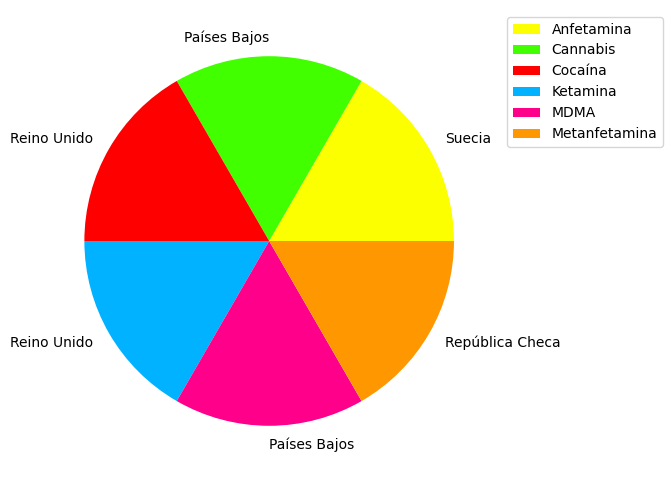

In [144]:
metagraph = plt.figure(figsize=(8,6))
plt.pie(x=metabolitos.value_counts(),
        colors= paleta,
        labels= ['Suecia', 'Países Bajos', 'Reino Unido', 'Reino Unido', 'Países Bajos', 'República Checa'])
plt.legend(leyenda, bbox_to_anchor=(1,1));

## Pandemia

Se procede a analizar la evolución del consumo para antes, durante y después de la pandemia

In [145]:
prepandemia = europa[europa.Year < 2020]
prepandemia = prepandemia.groupby(['Metabolite'], as_index=False).mean()

In [146]:
pandemia = europa[europa.Year == 2020]
pandemia = pandemia.groupby(['Metabolite', 'Year'], as_index=False).mean()

In [147]:
postpandemia = europa[europa.Year > 2020]
postpandemia = postpandemia.groupby(['Metabolite'], as_index=False).mean()

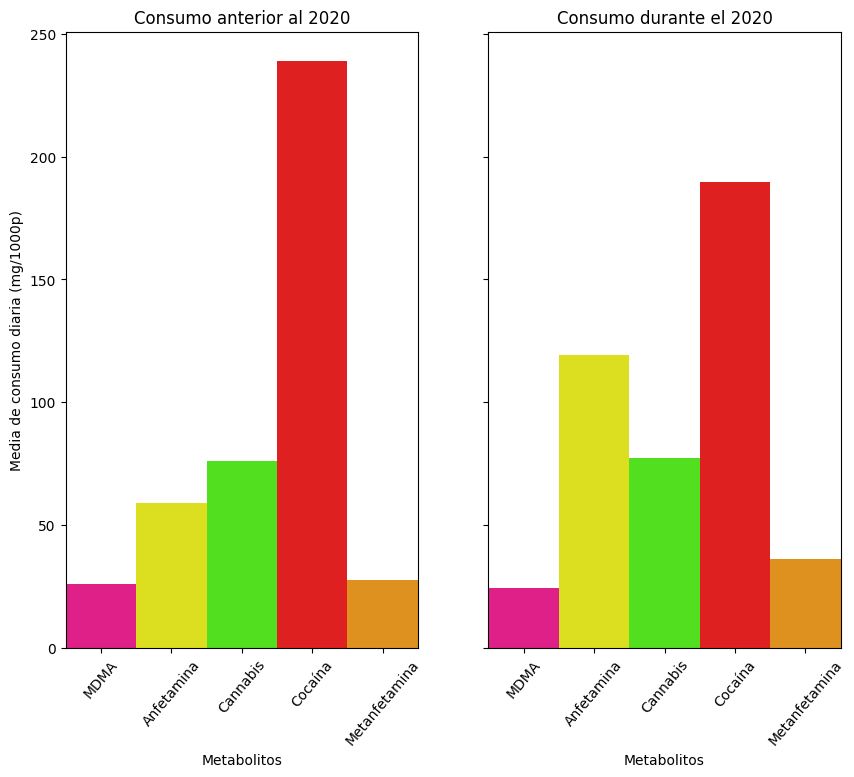

In [207]:
fig4, ax = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(10,8))
sns.barplot(data = prepandemia,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700'],
            width= 1,
            ax= ax[0])
ax[0].set_title('Consumo anterior al 2020')
ax[0].set_xlabel('Metabolitos')
ax[0].set_ylabel('Media de consumo diaria (mg/1000p)')
ax[0].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina'], rotation=50)

sns.barplot(data = pandemia,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700'],
            width= 1,
            ax=ax[1])
ax[1].set_title('Consumo durante el 2020')
ax[1].set_xlabel('Metabolitos')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina'], rotation=50);

In [149]:
# Aumentan principalmente las drogas de laboratorio, mientras que otras como la cocaína, disminuyen, probablemente por limitaciones de tráfico.

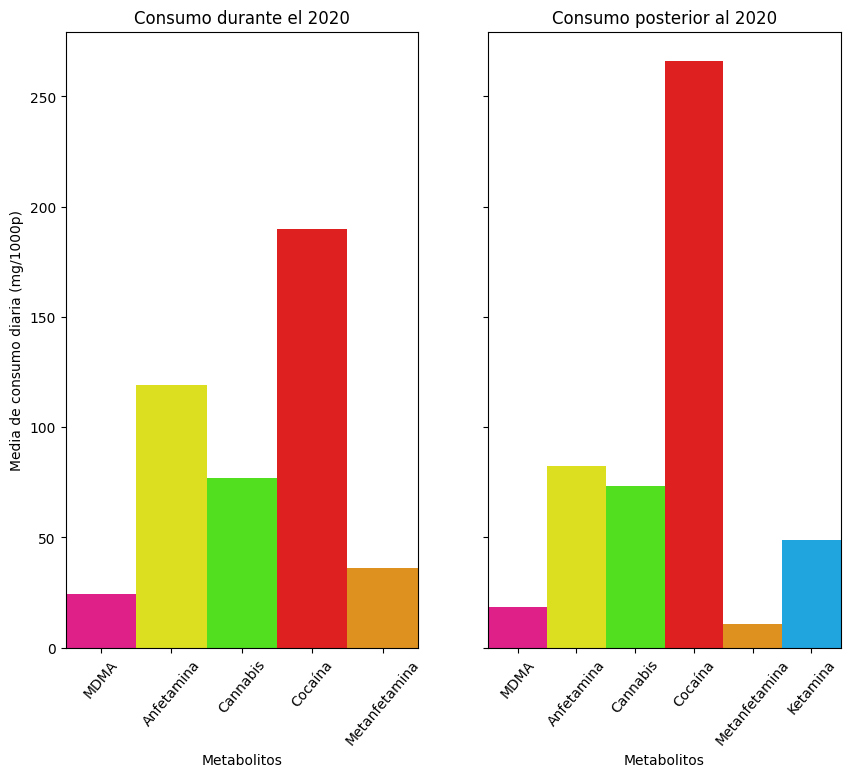

In [201]:
fig5, ax = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(10,8))
sns.barplot(data = pandemia,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700'],
            width= 1,
            ax=ax[0])
ax[0].set_title('Consumo durante el 2020')
ax[0].set_xlabel('Metabolitos')
ax[0].set_ylabel('Media de consumo diaria (mg/1000p)')
ax[0].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina'], rotation=50)

sns.barplot(data = postpandemia,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700', '#00B2FF'],
            width= 1,
            ax= ax[1])
ax[1].set_title('Consumo posterior al 2020')
ax[1].set_xlabel('Metabolitos')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina', 'Ketamina'], rotation=50);

### Consumo Total

In [151]:
# Calculamos consumo total de cada período.
contotalpre = prepandemia.drop(columns=['Year', 'Metabolite']).sum()
contotalpandemia = pandemia.drop(columns=['Year', 'Metabolite']).sum()
contotalpost = postpandemia.drop(columns=['Year', 'Metabolite']).sum()

In [152]:
# Creamos un dataframe con los datos para poder graficarlos.
contotal= pd.DataFrame({'Prepandemia' : contotalpre,
                        'Pandemia' : contotalpandemia,
                        'Postpandemia' : contotalpost}).reset_index().drop(columns='index')
contotal = contotal.T
contotal.reset_index(inplace=True)

Text(0, 0.5, 'Media de consumo diaria (mg/1000p)')

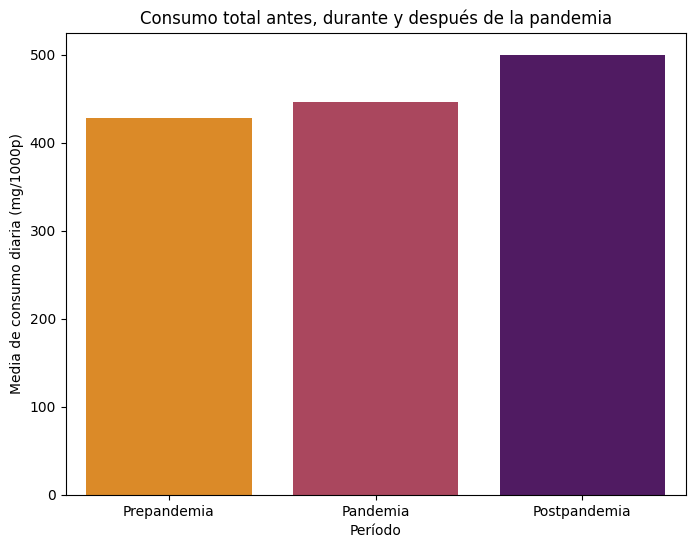

In [190]:
figcontotal, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= contotal,
            x='index',
            y=contotal[0],
            palette='inferno_r')
ax.set_title('Consumo total antes, durante y después de la pandemia')
ax.set_xlabel('Período')
ax.set_ylabel('Media de consumo diaria (mg/1000p)')

# España

#### Problemas Encontrados

In [154]:
españa = europafull[europafull.Country == 'España']
españa.City.replace({'Madrid VdlV' : 'Madrid',
                              'Valencia (3)' : 'Valencia'},
                              inplace=True)

c:\Users\ciruz\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [155]:
españa.groupby('City').describe()
# Lamentablemente, los datos del análisis de aguas residuales en España son limitados.
# Leyendo más sobre el tema, se debe a que el estudio solo se ha realizado en dichas plantas de tratamiento, es decir, solo diez de las 2125 del país;
#   es decir, únicamente el 0,4 % de las estaciones de depuración han recolectado datos al respecto.

Year                                                  \
                 count         mean       std     min      25%     50%   
City                                                                     
Barcelona         51.0  2016.254902  3.610225  2011.0  2013.00  2016.0   
Castellon         55.0  2016.509091  3.589453  2011.0  2013.00  2017.0   
Lleida             6.0  2022.000000  0.000000  2022.0  2022.00  2022.0   
Madrid            14.0  2018.071429  0.828742  2017.0  2017.25  2018.0   
Molina de Segura   8.0  2015.500000  0.534522  2015.0  2015.00  2015.5   
Santiago          55.0  2016.636364  3.581659  2011.0  2013.50  2017.0   
Tarragona          8.0  2021.500000  0.534522  2021.0  2021.00  2021.5   
Valencia          34.0  2016.382353  2.752571  2011.0  2014.00  2016.0   

                                 Wednesday              ... Weekend mean  \
                     75%     max     count        mean  ...          75%   
City                                                    ...                
Barcelona         2019.0  2022.0      51.0  143.977451  ...     129.0150   
Castellon         2019.5  2022.0      54.0   88.523519  ...      90.5750   
Lleida            2022.0  2022.0       6.0  142.618333  ...      73.5700   
Madrid            2019.0  2019.0      14.0   80.377143  ...      75.9325   
Molina de Segura  2016.0  2016.0       8.0   68.211250  ...      62.7225   
Santiago          2020.0  2022.0      55.0   67.965091  ...     104.9950   
Tarragona         2022.0  2022.0       8.0  190.775000  ...      65.5175   
Valencia          2018.0  2022.0      34.0   95.317647  ...     115.5875   

                          Daily mean                                         \
                      max      count        mean         std   min      25%   
City                                                                          
Barcelona         1101.17       51.0  170.911765  245.457988  8.43  29.4350   
Castellon          790.01       55.0   91.992000  166.397821  0.00   0.0000   
Lleida             859.47        6.0  149.321667  300.684454  0.00   7.5100   
Madrid             524.38       14.0  106.247857  179.583897  0.00   6.9625   
Molina de Segura   562.18        8.0   93.367500  186.893102  0.00   0.0000   
Santiago           661.60       55.0   87.674727  152.262517  0.00   0.0000   
Tarragona         1789.21        8.0  231.147500  558.082233  6.30   8.5350   
Valencia           717.14       34.0  121.974118  199.014133  0.91   8.0000   

                                             
                     50%       75%      max  
City                                         
Barcelona         46.770  150.4300   965.19  
Castellon          4.120   93.0050   714.41  
Lleida            21.465   73.3175   759.54  
Madrid            12.510   80.7175   504.86  
Molina de Segura   0.000   61.3600   509.94  
Santiago          14.320  104.8800   610.78  
Tarragona         35.460   65.2775  1610.55  
Valencia          14.365  131.2450   724.12  

[8 rows x 88 columns]

## Consumo General

In [156]:
evolcones = españa.groupby(['Metabolite', 'Year']).agg({'Daily mean' : 'mean'}).unstack(level=0)
evolcones[('Daily mean', 'cannabis')].fillna(method='ffill', inplace= True)
evolcones[('Daily mean', 'ketamine')].fillna(0, inplace= True)

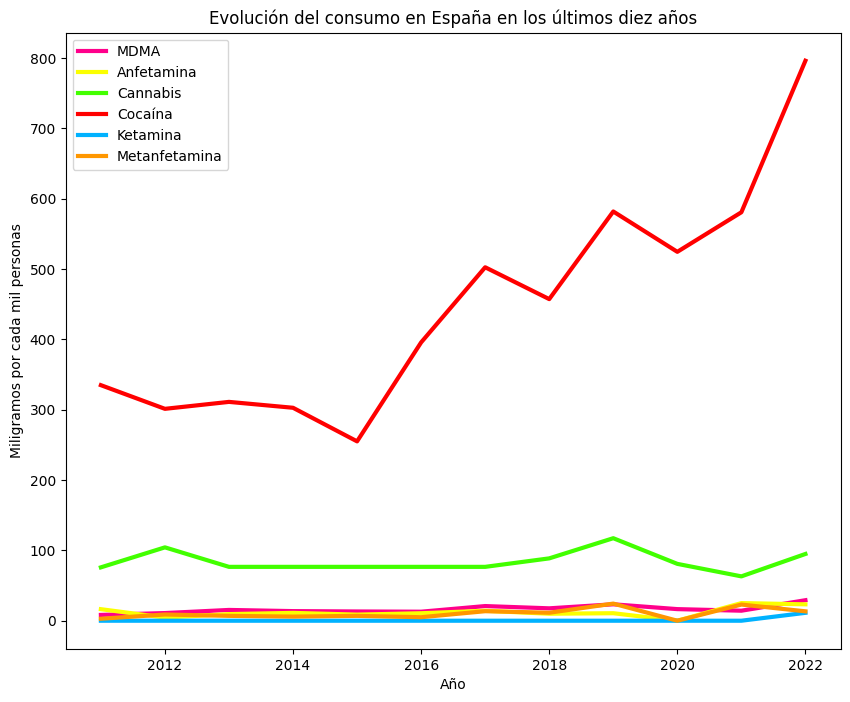

In [157]:
evolcones.plot(figsize = (10,8), title= 'Evolución del consumo en España en los últimos diez años',
                ylabel='Miligramos por cada mil personas',
                xlabel='Año',
                color= ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#00B2FF','#FF9700'],
                linewidth = 3);
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Ketamina', 'Metanfetamina']);

Se puede observar que la cocaína sigue siendo la droga predominante, sin embargo, es más notable la disminución (prácticamente, ausencia) del uso de otras drogas a excepción del cannabis.

### ¿Cuál es la droga más consumida en españa?
A simple vista, se puede observar que es, una vez más, la cocaína, pero se hará una gráfica de barras para observar mejor el resto.

In [158]:
topesp = españa.groupby(['Metabolite'], as_index=False).agg({'Daily mean' : 'mean'}).sort_values('Daily mean', ascending=False)

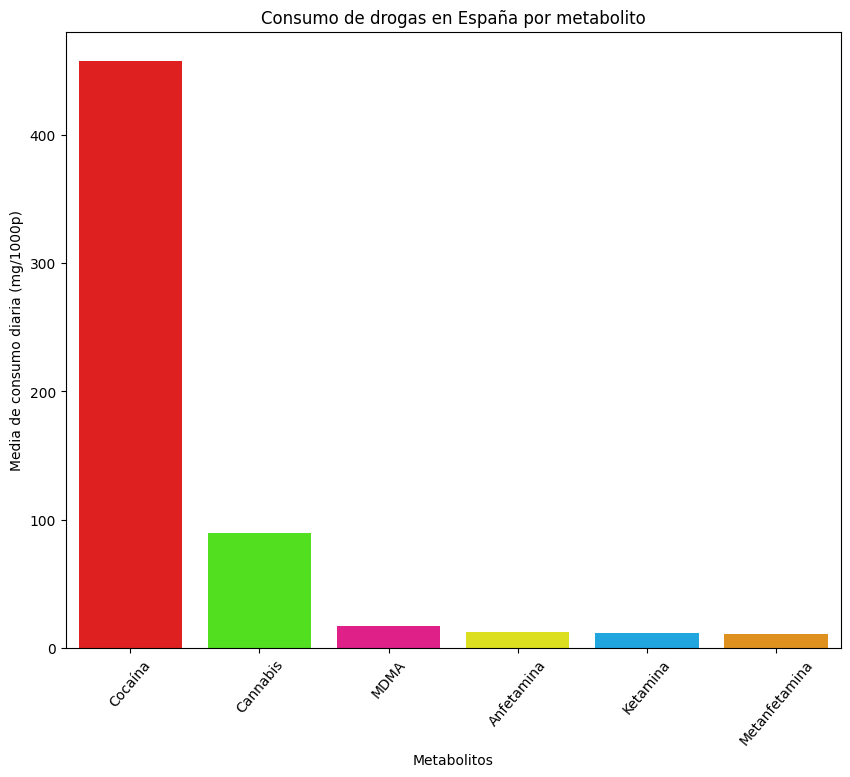

In [159]:
graf_topesp = plt.subplots(figsize= (10,8))
sns.barplot(x='Metabolite',
            y='Daily mean',
            data=topesp,
            palette=['#FF0000', '#42FF00', '#FF008B', '#FBFF00', '#00B2FF', '#FF9700'])
plt.xlabel('Metabolitos')
plt.ylabel('Media de consumo diaria (mg/1000p)')
plt.title('Consumo de drogas en España por metabolito')
plt.gca().set_xticklabels(['Cocaína', 'Cannabis', 'MDMA', 'Anfetamina', 'Ketamina', 'Metanfetamina'], rotation=50);

## Consumo Semanal

Ya conocemos cómo se distribuye el consumo semanal en europa, pero, ¿es igual en España?

In [160]:
semesp = españa.rename(columns=dias)
semesp.drop(columns=['Year','Site ID', 'Country', 'City', 'Weekday mean', 'Weekend mean', 'Daily mean'], inplace=True)
semesp = semesp.groupby('Metabolite').mean()
semesp = semesp.reindex(columns= ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
semesp.reset_index(inplace=True)

In [161]:
sespmelted = semesp.melt(id_vars=['Metabolite'],
                           value_vars=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
                           var_name='dia',
                           value_name= "cantidad")

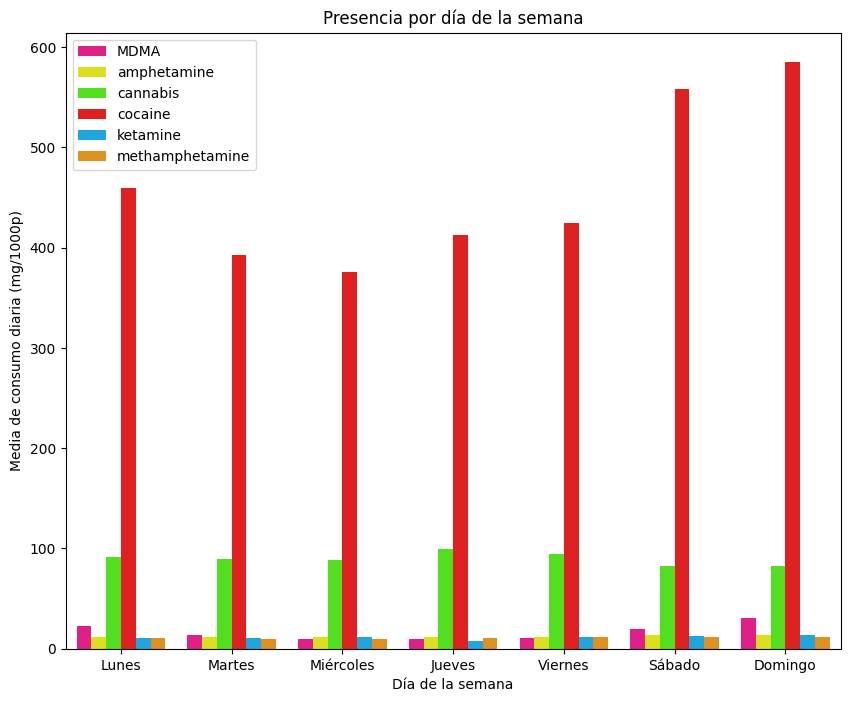

In [162]:
fig6, ax = plt.subplots(figsize=(10,8))
sns.barplot(data = sespmelted,
            x='dia',
            y='cantidad',
            hue='Metabolite',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#00B2FF', '#FF9700'])
ax.set_title('Presencia por día de la semana')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Media de consumo diaria (mg/1000p)')
ax.legend(loc='upper left');

Se puede observar que, sí, el consumo semanal español es bastante similar al europeo, con la única diferencia de que solo predominan la cocaína y el cannabis, cuando en la semana europea también destacan otras drogas, principalmente la anfetamina.

## Consumo por Ciudades

In [163]:
citesp = españa.groupby('City', as_index=False).agg({'Daily mean' : 'sum'}).sort_values('Daily mean', ascending=False)

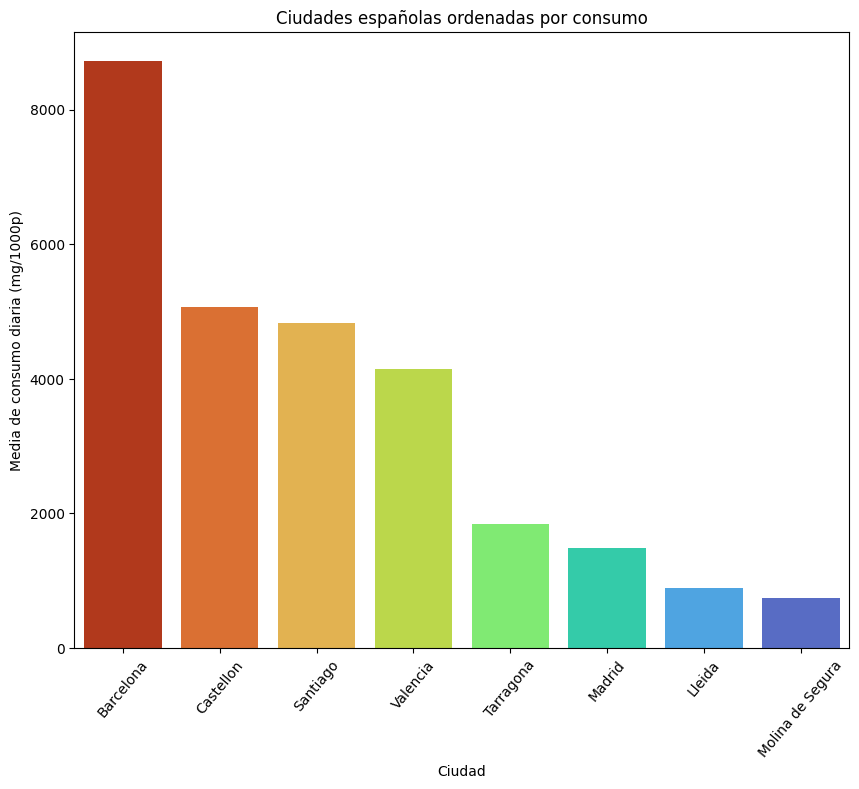

In [164]:
fig7 = plt.subplots(figsize= (10,8))
sns.barplot(x='City', y='Daily mean', data=citesp, palette='turbo_r')
plt.xlabel('Ciudad')
plt.ylabel('Media de consumo diaria (mg/1000p)')
plt.title('Ciudades españolas ordenadas por consumo')
plt.xticks(rotation=50);
# plt.ylim(bottom=70);

### Consumo por Metabolito

In [165]:
metesp = españa.groupby(['City','Metabolite']).agg({'Daily mean' : 'mean'})

In [166]:
# Anfetamina:
metesp.groupby('Metabolite').get_group('amphetamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    44.54
Name: (Tarragona, amphetamine), dtype: float64

In [167]:
# Cannabis
metesp.groupby('Metabolite').get_group('cannabis').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    140.82
Name: (Barcelona, cannabis), dtype: float64

In [168]:
# Cocaína
metesp.groupby('Metabolite').get_group('cocaine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    1610.55
Name: (Tarragona, cocaine), dtype: float64

In [169]:
# Ketamina
metesp.groupby('Metabolite').get_group('ketamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    29.45
Name: (Barcelona, ketamine), dtype: float64

In [170]:
# MDMA
metesp.groupby('Metabolite').get_group('MDMA').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    37.206364
Name: (Barcelona, MDMA), dtype: float64

In [171]:
# Metanfetamina
metesp.groupby('Metabolite').get_group('methamphetamine').sort_values('Daily mean', ascending=False).iloc[0]

Daily mean    42.086364
Name: (Barcelona, methamphetamine), dtype: float64

In [172]:
# No sé cómo puedo graficar esto, la verdad, puesto que solo son dos ciudades...
# Si lo pongo en un diccionario para hacer un dataframe, al tener longitudes diferentes (dos para Tarragona y cuatro para Barcelona) no es posible.

## Pandemia

In [173]:
espsimple = españa.drop(columns= ['Site ID','Country', 'City', 'Wednesday','Thursday','Friday','Saturday','Sunday','Monday','Tuesday','Weekday mean','Weekend mean'])

In [174]:
prepandemia_esp = espsimple[espsimple.Year < 2020]
prepandemia_esp = prepandemia_esp.groupby(['Metabolite'], as_index=False).mean()
prepandemia_esp.drop(columns='Year')

,Metabolite,Daily mean
0,MDMA,15.568649
1,amphetamine,10.646154
2,cannabis,92.955714
3,cocaine,392.864359
4,methamphetamine,10.040769


In [175]:
pandemia_esp = espsimple[espsimple.Year == 2020]
pandemia_esp = pandemia_esp.groupby(['Metabolite'], as_index=False).mean()
pandemia_esp = pandemia_esp[pandemia_esp['Daily mean'] > 0]
pandemia_esp.drop(columns='Year')

,Metabolite,Daily mean
0,MDMA,16.490
2,cannabis,80.815
3,cocaine,524.340


In [176]:
postpandemia_esp = espsimple[espsimple.Year > 2020]
postpandemia_esp = postpandemia_esp.groupby(['Metabolite'], as_index=False).mean()
postpandemia_esp.drop(columns='Year')

,Metabolite,Daily mean
0,MDMA,20.870000
1,amphetamine,23.957500
2,cannabis,84.274444
3,cocaine,724.177778
4,ketamine,11.223333
5,methamphetamine,16.960000


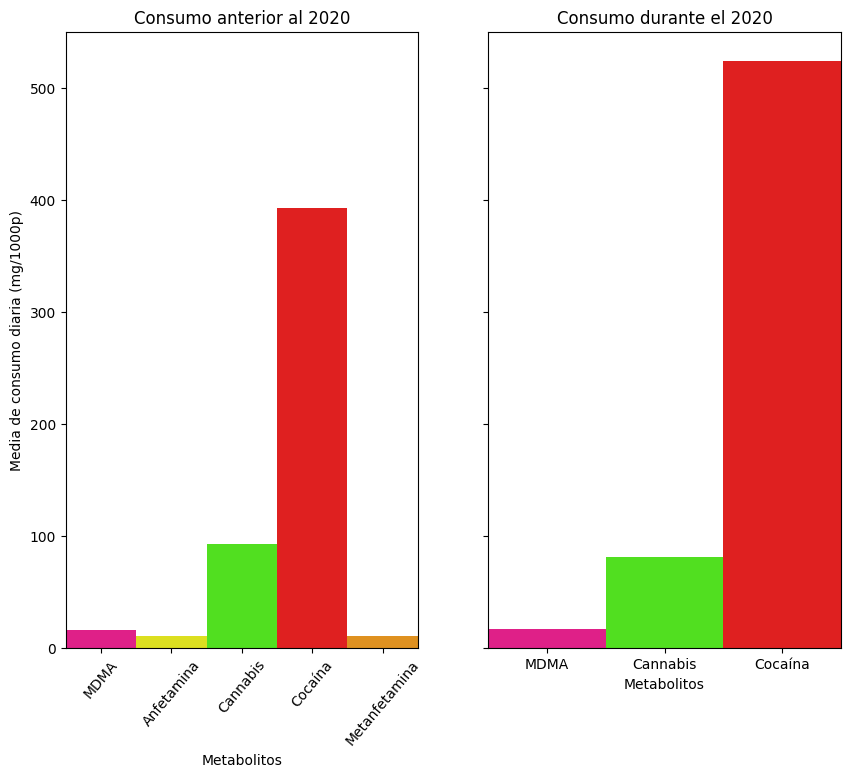

In [212]:
fig8, ax = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(10,8))
sns.barplot(data = prepandemia_esp,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700'],
            width= 1,
            ax= ax[0])
ax[0].set_title('Consumo anterior al 2020')
ax[0].set_xlabel('Metabolitos')
ax[0].set_ylabel('Media de consumo diaria (mg/1000p)')
ax[0].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina'], rotation=50)

sns.barplot(data = pandemia_esp,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#42FF00', '#FF0000'],
            width= 1,
            ax=ax[1])
ax[1].set_title('Consumo durante el 2020')
ax[1].set_xlabel('Metabolitos')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels = ['MDMA', 'Cannabis', 'Cocaína']);

Sorprendentemente, a diferencia del modelo europeo, pasa todo lo contrario: aumenta el consumo de cocaína y desaparecen las "drogas sintéticas", a excepción del MDMA. 

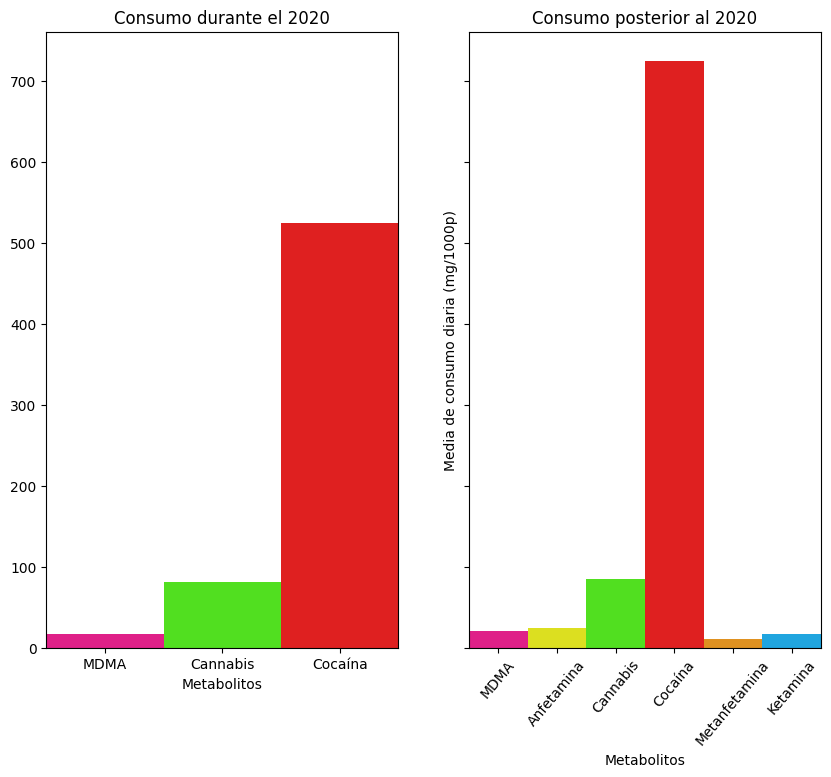

In [178]:
fig9, ax = plt.subplots(nrows=1, ncols=2, sharey= True, figsize=(10,8))
sns.barplot(data = pandemia_esp,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#42FF00', '#FF0000'],
            width= 1,
            ax=ax[0])
ax[0].set_title('Consumo durante el 2020')
ax[0].set_xlabel('Metabolitos')
ax[0].set_ylabel('')
ax[0].set_xticklabels(labels = ['MDMA', 'Cannabis', 'Cocaína'])

sns.barplot(data = postpandemia_esp,
            x='Metabolite',
            y='Daily mean',
            palette = ['#FF008B', '#FBFF00', '#42FF00', '#FF0000', '#FF9700', '#00B2FF'],
            width= 1,
            ax= ax[1])
ax[1].set_title('Consumo posterior al 2020')
ax[1].set_xlabel('Metabolitos')
ax[1].set_ylabel('Media de consumo diaria (mg/1000p)')
ax[1].set_xticklabels(labels = ['MDMA', 'Anfetamina', 'Cannabis', 'Cocaína', 'Metanfetamina', 'Ketamina'], rotation=50);

Pero, esta vez sí, se asemeja más al modelo europeo al reaparecer el resto de drogas y aumentar el consumo de las ya disponibles.

### Consumo Total

In [179]:
# Calculamos consumo total de cada período.
contotalpre_es = prepandemia_esp.drop(columns=['Year', 'Metabolite']).sum()
contotalpandemia_es = pandemia_esp.drop(columns=['Year', 'Metabolite']).sum()
contotalpost_es = postpandemia_esp.drop(columns=['Year', 'Metabolite']).sum()

In [180]:
# Creamos un dataframe con los datos para poder graficarlos.
contotal_es= pd.DataFrame({'Prepandemia' : contotalpre_es,
                        'Pandemia' : contotalpandemia_es,
                        'Postpandemia' : contotalpost_es}).reset_index().drop(columns='index')
contotal_es = contotal_es.T
contotal_es.reset_index(inplace=True)

Text(0, 0.5, 'Media de consumo diaria (mg/1000p)')

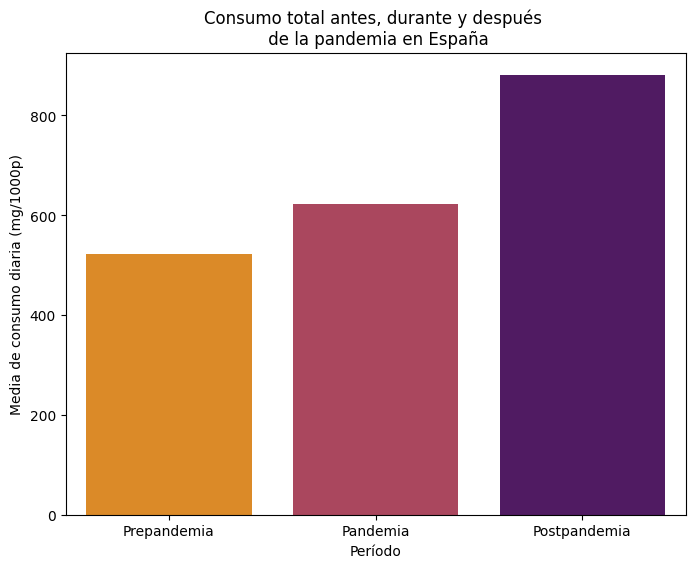

In [189]:
fig10, ax = plt.subplots(figsize=(8,6))
sns.barplot(data= contotal_es,
            x='index',
            y=contotal_es[0],
            palette='inferno_r')
ax.set_title('Consumo total antes, durante y después \n de la pandemia en España')
ax.set_xlabel('Período')
ax.set_ylabel('Media de consumo diaria (mg/1000p)')

# Conclusiones

Hagamos una recapitulación de las hipótesis, para responderlas una a una.

### 1) El consumo de drogas en España está directamente relacionado a su población.

Se ha podido observar que tanto en Europa como en España las dos variables son completamente independientes, es decir, el consumo de drogas no se ve afectado de ninguna manera con el crecimiento o decrecimiento de la población.

### 2) El consumo de drogas ha aumentado desde la pandemia

También se ha demostrado que efectivamente, tanto en Europa como en España no solo ha aumentado el consumo de drogas, sino también la variedad de las mismas.

### 3) El consumo de cocaína es mayor que el consumo de otras drogas

Otra hipótesis acertada, puesto que también se comprueba que la cocaína es, con gran diferencia, la droga más consumida, tanto a nivel europeo como español, además de no disminuir considerablemente su consumo durante los períodos estudiados.